# Nuottamäen lämpodatan analyysiä

ladataan tarvittavat kirjastot

In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

timezone = 'Europe/Helsinki'
csv_folder = 'lampotilat/data/'
matplotlib.rcParams['figure.figsize'] = [16, 5]

Metodi jolla ladataan csv tiedoistosta data, putsataan hieman 

In [81]:
def load_data(name):
    df = pd.read_csv(csv_folder+name+'.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
    df.columns = ['epoch', 'data']
    df['date'] = pd.to_datetime(df['epoch'], unit='ms', utc=True)
    df[name] = pd.to_numeric(df['data'], errors='coerce')
    df = df.set_index('date').drop(columns=['epoch', 'data'])
    df = df.tz_convert(tz=timezone)
    df = df[df[name]<50]
    df = df[df[name]>-50]
    return df

Edellistä metodia käyttäen motdi lataa kaikki sarjat samaan dataframeen. Jos saman tunnin aikana on monta mittausta, otetaan keskiarvo

In [82]:
def load_dataset():
    df = pd.concat([load_data('sisalla'), load_data('ulkona'), load_data('jarvessa'),  load_data('kellarissa'), load_data('rauhalassa'), load_data('saunassa'),])
    df = df.sort_values('date')
    df = df.groupby(pd.Grouper(freq='H')).mean()
    return df

Ladataan data, ja luodaan dataframe jossa päivittäiset keskiarvot

In [83]:
df = load_dataset()
df_daily = df.groupby(pd.Grouper(freq='D')).mean()
print(df)

                             sisalla  ulkona  jarvessa  kellarissa  \
date                                                                 
2014-06-29 13:00:00+03:00        NaN  11.000       NaN         NaN   
2014-06-29 14:00:00+03:00        NaN  10.900       NaN         NaN   
2014-06-29 15:00:00+03:00        NaN  11.150       NaN         NaN   
2014-06-29 16:00:00+03:00        NaN  11.575       NaN         NaN   
2014-06-29 17:00:00+03:00        NaN  11.800       NaN         NaN   
...                              ...     ...       ...         ...   
2021-01-02 06:00:00+02:00  22.200000     NaN       NaN         NaN   
2021-01-02 07:00:00+02:00  21.833333     NaN       NaN         NaN   
2021-01-02 08:00:00+02:00  21.466667     NaN       NaN         NaN   
2021-01-02 09:00:00+02:00  21.166667     NaN       NaN         NaN   
2021-01-02 10:00:00+02:00  20.900000     NaN       NaN         NaN   

                           rauhalassa  saunassa  
date                                   

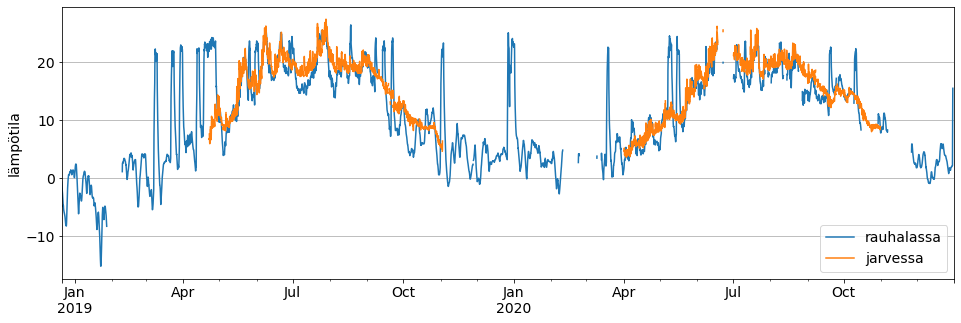

In [84]:
df2 = df[['rauhalassa','jarvessa']].loc['2018-12-21':'2020-12-31']
fig = df2.plot(kind='line',  figsize=(16, 5), fontsize=14).get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].set_ylabel('lämpötila', fontsize=14)
fig.axes[0].set_xlabel('')
fig.axes[0].grid(axis='y')
fig.savefig('chart.png')

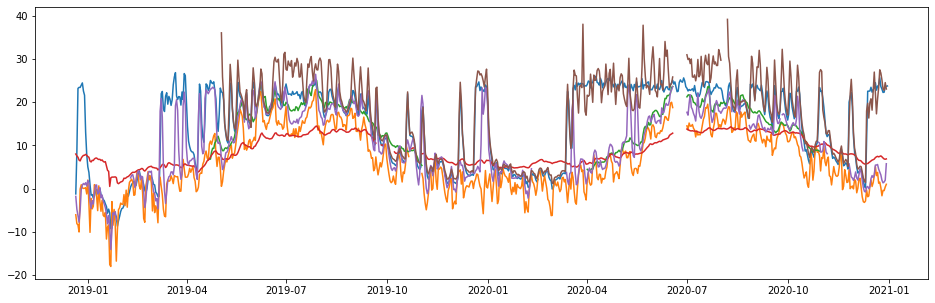

In [85]:
df2 = df_daily.loc['2018-12-21':'2020-12-31']
plt.plot(df2);

# Keskiarvojen laskeminen

                             sisalla     ulkona   jarvessa  kellarissa  \
date                                                                     
2014-06-30 00:00:00+03:00        NaN  12.021780  16.279688         NaN   
2014-07-31 00:00:00+03:00  24.879348  18.541722  22.441584   14.045778   
2014-08-31 00:00:00+03:00  19.373799  16.166689  21.637970   14.006791   
2014-09-30 00:00:00+03:00  13.514981  11.257095  16.542014   11.231018   
2014-10-31 00:00:00+02:00  10.485244   5.779131   8.849108    8.657748   
...                              ...        ...        ...         ...   
2020-09-30 00:00:00+03:00  20.050556  12.021731  15.395714   13.138167   
2020-10-31 00:00:00+02:00  14.577740   7.505529  11.547326   11.397182   
2020-11-30 00:00:00+02:00  11.253380   3.763245        NaN    8.859444   
2020-12-31 00:00:00+02:00  16.003293   0.449998        NaN    6.702100   
2021-01-31 00:00:00+02:00  23.321528        NaN        NaN         NaN   

                           rauhalassa

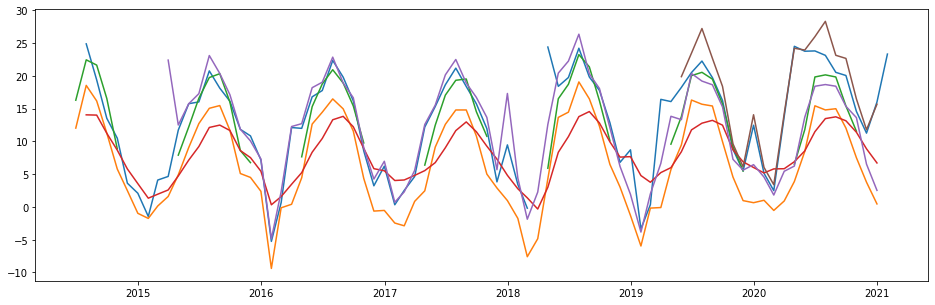

In [86]:
df_monthly = df_daily.groupby(pd.Grouper(freq='M')).mean()
print(df_monthly)
plt.plot(df_monthly);

In [87]:
df_yearly = df_monthly.groupby(pd.Grouper(freq='Y')).mean()
print(df_yearly)

                             sisalla    ulkona   jarvessa  kellarissa  \
date                                                                    
2014-12-31 00:00:00+02:00  12.323797  9.322969  17.150073    9.544941   
2015-12-31 00:00:00+02:00  11.298857  6.731995  13.512693    7.058410   
2016-12-31 00:00:00+02:00  10.859039  5.711381  15.241330    7.410725   
2017-12-31 00:00:00+02:00  11.174624  5.741504  14.289830    7.639811   
2018-12-31 00:00:00+02:00  14.173759  6.186813  16.000929    7.680158   
2019-12-31 00:00:00+02:00  12.759845  6.028236  14.225151    8.330836   
2020-12-31 00:00:00+02:00  16.584273  6.886282  15.005340    9.251932   
2021-12-31 00:00:00+02:00  23.321528       NaN        NaN         NaN   

                           rauhalassa   saunassa  
date                                              
2014-12-31 00:00:00+02:00         NaN        NaN  
2015-12-31 00:00:00+02:00   15.772658        NaN  
2016-12-31 00:00:00+02:00   11.524280        NaN  
2017-12-31 00:

In [90]:
df_monthly.groupby(pd.Grouper(freq='M')).mean()

,sisalla,ulkona,jarvessa,kellarissa,rauhalassa,saunassa
date,,,,,,
2014-06-30 00:00:00+03:00,NaN,12.021780,16.279688,NaN,NaN,NaN
2014-07-31 00:00:00+03:00,24.879348,18.541722,22.441584,14.045778,NaN,NaN
2014-08-31 00:00:00+03:00,19.373799,16.166689,21.637970,14.006791,NaN,NaN
2014-09-30 00:00:00+03:00,13.514981,11.257095,16.542014,11.231018,NaN,NaN
2014-10-31 00:00:00+02:00,10.485244,5.779131,8.849108,8.657748,NaN,NaN
...,...,...,...,...,...,...
2020-09-30 00:00:00+03:00,20.050556,12.021731,15.395714,13.138167,15.346721,22.659672
2020-10-31 00:00:00+02:00,14.577740,7.505529,11.547326,11.397182,13.624859,16.481885
2020-11-30 00:00:00+02:00,11.253380,3.763245,NaN,8.859444,6.522746,11.771262


In [98]:
df_monthly['month'] = pd.DatetimeIndex(df_monthly.index).month
df=df_monthly.groupby(['month']).mean()
print(df)
#df.to_html()

         sisalla     ulkona   jarvessa  kellarissa  rauhalassa   saunassa
month                                                                    
1       3.155551  -3.392670        NaN    3.063249    0.182812   6.023077
2       1.642504  -1.873638        NaN    3.089513    1.302293   3.382300
3      10.316851  -0.206701        NaN    3.593133    9.094372  14.246919
4      16.810148   4.268791   7.313629    5.223637   11.735200  24.207355
5      18.040761  10.401380  13.672529    7.919301   16.147149  21.906090
6      19.409555  13.994972  18.178031   10.437692   19.577001  24.720150
7      22.678539  16.340272  20.908446   13.017065   22.111592  27.767779
8      19.393519  15.463899  20.153950   13.538248   19.254065  22.905501
9      16.515523  11.377412  15.677297   12.141579   16.526990  20.522813
10     11.286720   5.535375   9.834779    9.351833   11.256511  13.048179
11      6.428861   2.421384   6.115328    7.106912    6.381357   8.937580
12      8.868893   0.225594        NaN

# Liiketunnistin

tunneittain

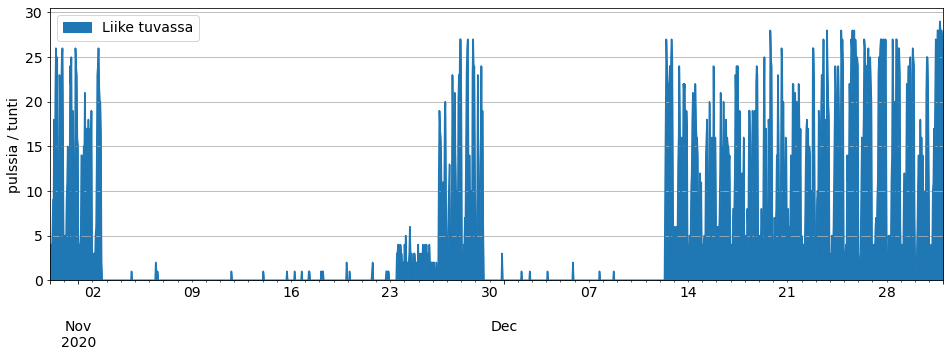

In [42]:
df = pd.read_csv(csv_folder+'liike.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
df.columns = ['epoch']
df = df[df['epoch'].str.len()<15]
df['epoch'] = df['epoch'].str[0:-3]
df['Liike tuvassa'] = 1
df['date'] = pd.to_datetime(df['epoch'], unit='s', utc=True)
df = df.set_index('date').drop(columns=['epoch'])
df = df.tz_convert(tz=timezone)
df = df.groupby(pd.Grouper(freq='H')).sum()

fig = df.loc['2020-10-30':'2020-12-31'].plot.area(figsize=(16, 5), fontsize=14).get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].set_ylabel('pulssia / tunti', fontsize=14)
fig.axes[0].set_xlabel('')
fig.axes[0].grid(axis='y')
fig.savefig('chart.png')


Päivittäin

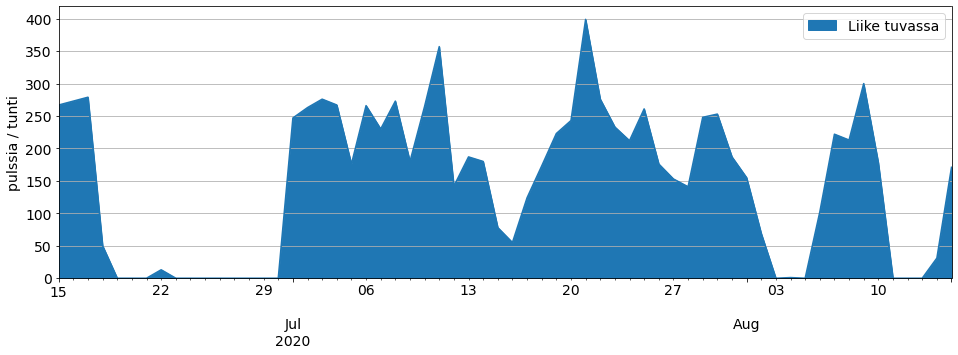

In [46]:
df = df.groupby(pd.Grouper(freq='D')).sum()

fig = df.loc['2020-6-15':'2020-8-15'].plot.area(figsize=(16, 5), fontsize=14).get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].set_ylabel('pulssia / tunti', fontsize=14)
fig.axes[0].set_xlabel('')
fig.axes[0].grid(axis='y')
fig.savefig('chart.png')

# Sademäärä

                           sademaara
date                                
2016-07-28 19:00:00+03:00        0.0
2016-07-28 20:00:00+03:00        0.9
2016-07-28 21:00:00+03:00        0.4
2016-07-28 22:00:00+03:00        0.2
2016-07-28 23:00:00+03:00        0.3
...                              ...
2021-01-01 11:00:00+02:00        0.0
2021-01-01 12:00:00+02:00        0.0
2021-01-01 13:00:00+02:00        0.0
2021-01-01 14:00:00+02:00        0.0
2021-01-01 15:00:00+02:00        0.0

[38393 rows x 1 columns]


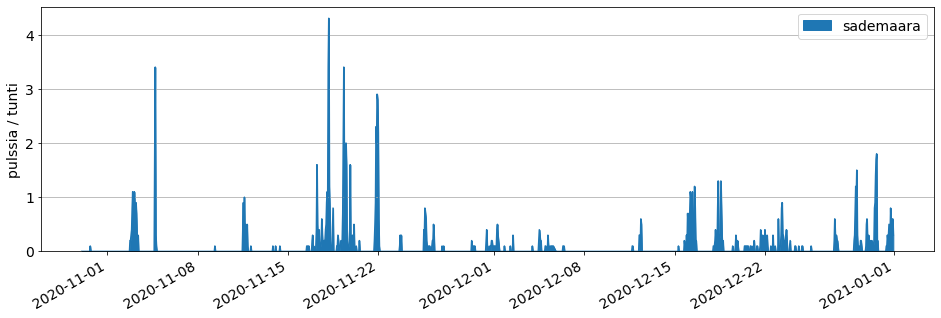

In [4]:
df = pd.read_csv(csv_folder+'sade.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
df.columns = ['epoch', 'data']
df = df[df['epoch'].str.len()<15]
df['epoch'] = df['epoch'].str[0:-3]
df['sademaara'] = pd.to_numeric(df['data'], errors='coerce')
df['date'] = pd.to_datetime(df['epoch'], unit='s', utc=True)
df = df.set_index('date').drop(columns=['epoch', 'data'])
df = df.tz_convert(tz=timezone)
print(df)

fig = df.loc['2020-10-30':'2020-12-31'].plot.area(figsize=(16, 5), fontsize=14).get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].set_ylabel('mm / tunti', fontsize=14)
fig.axes[0].set_xlabel('')
fig.axes[0].grid(axis='y')
fig.savefig('chart.png')

# Tuuli

Tuulidata on tallennettu 10min välein

                            tuuli1h
date                               
2017-04-21 21:00:00+03:00  1.400000
2017-04-21 22:00:00+03:00  1.633333
2017-04-21 23:00:00+03:00  1.250000
2017-04-22 00:00:00+03:00  0.916667
2017-04-22 01:00:00+03:00  1.166667
...                             ...
2021-01-01 11:00:00+02:00  0.000000
2021-01-01 12:00:00+02:00  0.000000
2021-01-01 13:00:00+02:00  0.000000
2021-01-01 14:00:00+02:00  0.383333
2021-01-01 15:00:00+02:00  1.300000

[32420 rows x 1 columns]
                           tuuli  tuuli1h
date                                     
2017-04-21 21:10:00+03:00    1.3      NaN
2017-04-21 21:20:00+03:00    1.3      NaN
2017-04-21 21:30:00+03:00    1.1      NaN
2017-04-21 21:40:00+03:00    1.3      NaN
2017-04-21 21:50:00+03:00    2.0      NaN
2017-04-21 22:00:00+03:00    1.6      NaN
2017-04-21 22:10:00+03:00    1.6      NaN
2017-04-21 22:20:00+03:00    1.5      NaN
2017-04-21 22:30:00+03:00    1.9      NaN
2017-04-21 22:40:00+03:00    1.6      NaN


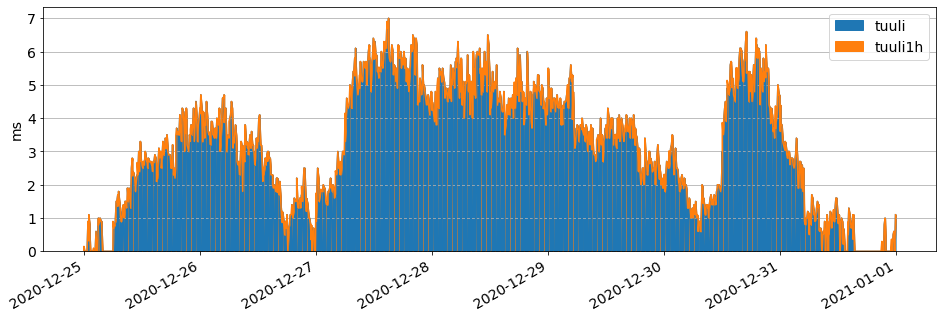

In [78]:
df = pd.read_csv(csv_folder+'tuuli.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
df.columns = ['epoch', 'data']
df = df[df['epoch'].str.len()<15]
df['epoch'] = df['epoch'].str[0:-3]
df['tuuli'] = pd.to_numeric(df['data'], errors='coerce')
df['date'] = pd.to_datetime(df['epoch'], unit='s', utc=True)
df = df.set_index('date').drop(columns=['epoch', 'data'])
df = df.tz_convert(tz=timezone)
df_hourly = df.groupby(pd.Grouper(freq='H')).mean()
df_hourly['tuuli1h']=df_hourly['tuuli']
df_hourly=df_hourly.drop(columns=['tuuli'])
print(df_hourly)
df = pd.concat([df,df_hourly])
print(df.head(10))

fig = df.loc['2020-12-25':'2020-12-31'].plot.area(figsize=(16, 5), fontsize=14).get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].set_ylabel('ms', fontsize=14)
fig.axes[0].set_xlabel('')
fig.axes[0].grid(axis='y')
fig.savefig('chart.png')

In [79]:
df=df.groupby(pd.Grouper(freq='H')).agg({'tuuli': ['mean', 'max']})
print(df)

                              tuuli     
                               mean  max
date                                    
2017-04-21 21:00:00+03:00  1.400000  2.0
2017-04-21 22:00:00+03:00  1.633333  1.9
2017-04-21 23:00:00+03:00  1.250000  1.4
2017-04-22 00:00:00+03:00  0.916667  1.4
2017-04-22 01:00:00+03:00  1.166667  1.8
...                             ...  ...
2021-01-01 11:00:00+02:00  0.000000  0.0
2021-01-01 12:00:00+02:00  0.000000  0.0
2021-01-01 13:00:00+02:00  0.000000  0.0
2021-01-01 14:00:00+02:00  0.383333  0.9
2021-01-01 15:00:00+02:00  1.300000  1.3

[32420 rows x 2 columns]


# Datojen vertailu

(272899, 1)
278140
rivejä joissa eroja:  (11299, 2)


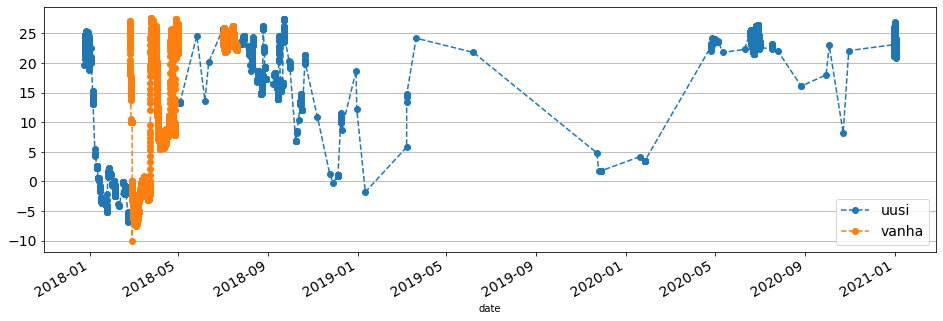

In [3]:
df1 = pd.read_csv(csv_folder+'sisalla.csv', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
df1.columns = ['epoch', 'data']
df1['date'] = pd.to_datetime(df1['epoch'], unit='ms', utc=True)
df1['uusi'] = pd.to_numeric(df1['data'], errors='coerce')
df1=df1[df1['uusi'].notnull()]
df1 = df1.set_index('date').drop(columns=['epoch', 'data'])
df1 = df1[~df1.index.duplicated(keep='first')]
print(df1.shape)


df2 = pd.read_csv(csv_folder+'sisalla.csv.vanha', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
df2.columns = ['epoch', 'data']
df2['date'] = pd.to_datetime(df2['epoch'], unit='ms', utc=True)
df2['vanha'] = pd.to_numeric(df2['data'], errors='coerce')
df2=df2[df2['vanha'].notnull()]
df2 = df2.set_index('date').drop(columns=['epoch', 'data'])
df2 = df2[~df2.index.duplicated(keep='first')]
print(df2.shape[0])

df= pd.concat([df1,df2], axis=1)
df = df.sort_values('date')

df_erot=df[df['uusi'].isnull() | df['vanha'].isnull()]

fig = df_erot.plot(kind='line', figsize=(16, 5), fontsize=14, linestyle='--', marker='o').get_figure()
fig.axes[0].legend(loc='best', fontsize=14)
fig.axes[0].grid(axis='y')
print('rivejä joissa eroja: ',df_erot.shape)



koodi jolla yhdistetään

In [16]:
tiedosto='sisalla.csv'

df1 = pd.read_csv(csv_folder+tiedosto, sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
print('Data1: rivejä ',df1.shape[0])
df1.columns = ['epoch', 'data']
df1['data1'] = pd.to_numeric(df1['data'], errors='coerce')
df1 = df1[df1['data1'].notnull()]
print('Data1: rivejä nan datarivien poiston jälkeen',df1.shape[0])
df1 = df1.set_index('epoch').drop(columns=['data'])
df1 = df1[~df1.index.duplicated(keep='first')]
print('Data1: rivejä duplikaattien epochrivien poiston jälkeen',df1.shape[0])
print()

df2 = pd.read_csv(csv_folder+tiedosto+'.vanha', sep=',', warn_bad_lines=False, error_bad_lines=False, dtype=str)
print('Data2: rivejä ',df2.shape[0])
df2.columns = ['epoch', 'data']
df2['data1'] = pd.to_numeric(df2['data'], errors='coerce')
df2 = df2[df2['data1'].notnull()]
print('Data2: rivejä nan datarivien poiston jälkeen',df2.shape[0])
df2 = df2.set_index('epoch').drop(columns=['data'])
df2 = df2[~df2.index.duplicated(keep='first')]
print('Data2: rivejä duplikaattien epochrivien poiston jälkeen',df2.shape[0])
print()

df=df1.append(df2)
print('Join: rivejä yhdistämisen jälkeenä',df.shape[0])
df = df[~df.index.duplicated(keep='first')]
print('Join: rivejä duplikaattien poiston jälkeenä',df.shape[0])

print(df)

str = df.to_csv(sep=',', float_format='%.1f', header=False)
str = str[:-1]
f = open(csv_folder+tiedosto+'.uusi', 'w')
f.write(str)
f.close()


Data1: rivejä  272965
Data1: rivejä nan datarivien poiston jälkeen 272950
Data1: rivejä duplikaattien epochrivien poiston jälkeen 272899

Data2: rivejä  278238
Data2: rivejä nan datarivien poiston jälkeen 278206
Data2: rivejä duplikaattien epochrivien poiston jälkeen 278140

Join: rivejä yhdistämisen jälkeenä 551039
Join: rivejä duplikaattien poiston jälkeenä 281169
               data1
epoch               
1405072255000   21.8
1405072856000   21.0
1405073457000   20.6
1405074056000   20.4
1405074657000   20.0
...              ...
1532087680000   22.2
1532088280000   22.2
1532088880000   22.2
1532089481000   22.2
1532090081000   22.2

[281169 rows x 1 columns]
